## **CNN 연산**

* 연산 과정

1. 이미지 입력과 필터(커널) 의 합성곱을 하여 output 특징 맵을 추출해낸다.
    - feature map 크기 구하기
    - 입력 이미지를 nxn, 커널 크기를 fxf 크기라 할때
    - mxm크기의 feature map m의 값은
    - **m=n-f+1 이다**
2. 컬러 값을 가진 이미지일 경우 rgb값 모두 한 특징맵에 합쳐서 표기한다

    - 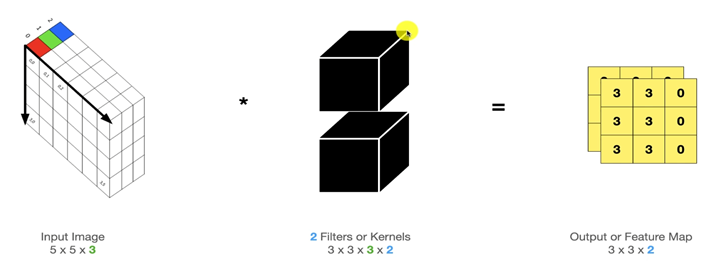

3. 특징맵을 추출해낼 떄 Kernel Size, Depth, Stride, Padding 을 고려한다
    - Kernel Size는 대칭점의 존재유무 때문에 홀수개일때가 짝수개일때보다 나은 경향이 있다
    - Depth는 사용된 필터의 갯수에 따라 결정된다
    - Padding은 입력 데이터 가장자리에 추가하는 여백이다
    - 특징 맵의 크기를 유지하여 정보의 손실을 방지하고 싶을 때 사용된다.
    - Stride는 슬라이딩 윈도우를 할 때 한번에 이동하는 픽셀을 의미한다.
    - 행과 열 모두 해당된다.
    - 연산량을 줄이고, 특징 맵 값끼리의 중복을 줄이기 위하여 크기를 키운다
    - stride와 padding 을 고려할 시에 나오는 feature map은 다음과 같다
    - 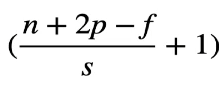
    - feature map 추출은 여러번 반복시키기도 한다.
    - 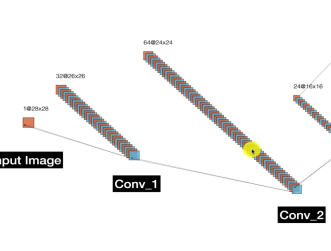

4. 추출된 feature map 에 활성화 함수 연산을 한다.
    - 보통 활성화 함수는 ReLU 를 사용한다.

    - 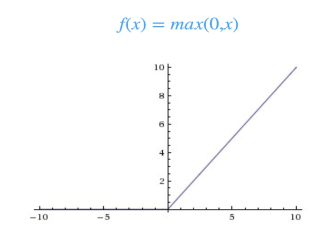



5. 데이터의 차원, 파라미터를 줄이면서 대부분의 정보를 보존하기 위하여 pooling 을 시행한다.
    - Subsampling, Downsampling 이라고도 한다.
    - kernel size와 stride를 설정한다.
    - 모델을 이미지 왜곡과 변형에 덜 민감하게 만듬
    - 최하단 레이어의 데이터는 인접 픽셀과 높은 상관관계를 가지고 있기 떄문에 풀링을 하더라도 정보 손실이 거의 없게 됨
    - 스트라이드를 과하게 키울 경우 높은 정보손실을 유발함함
    - 보통 2x2 에 2를 설정한다.

    - 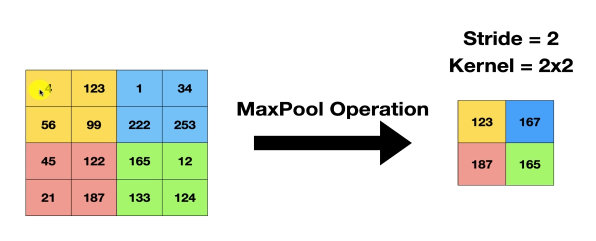



6. 모든 feature map을 flatten 한 뒤 Fully Connected Layer을 통과시킨다.
    - 모든 feature map을 1차원 벡터로 펼친 후 완전연결 레이어를 통과시킨다.
    - 이 과정에서 특징 간의 관계를 학습시킨다
    - 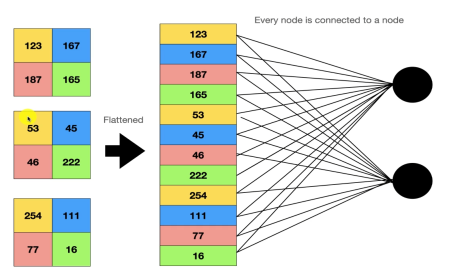

7. 마지막으로 FC Layer을 통과하고 나온 스코어를 softmax 함수를 통해 확률분포로 변환한다.
    - 최종적으로 결과의 예상값을 확률 형태로 알수 있게 된다.

    - 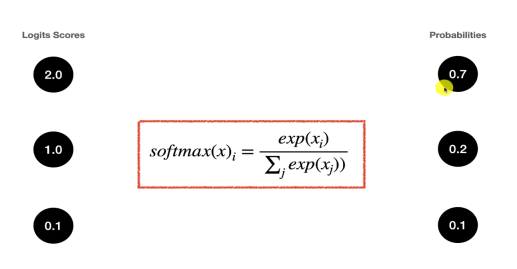

    

## cnn 정리
- 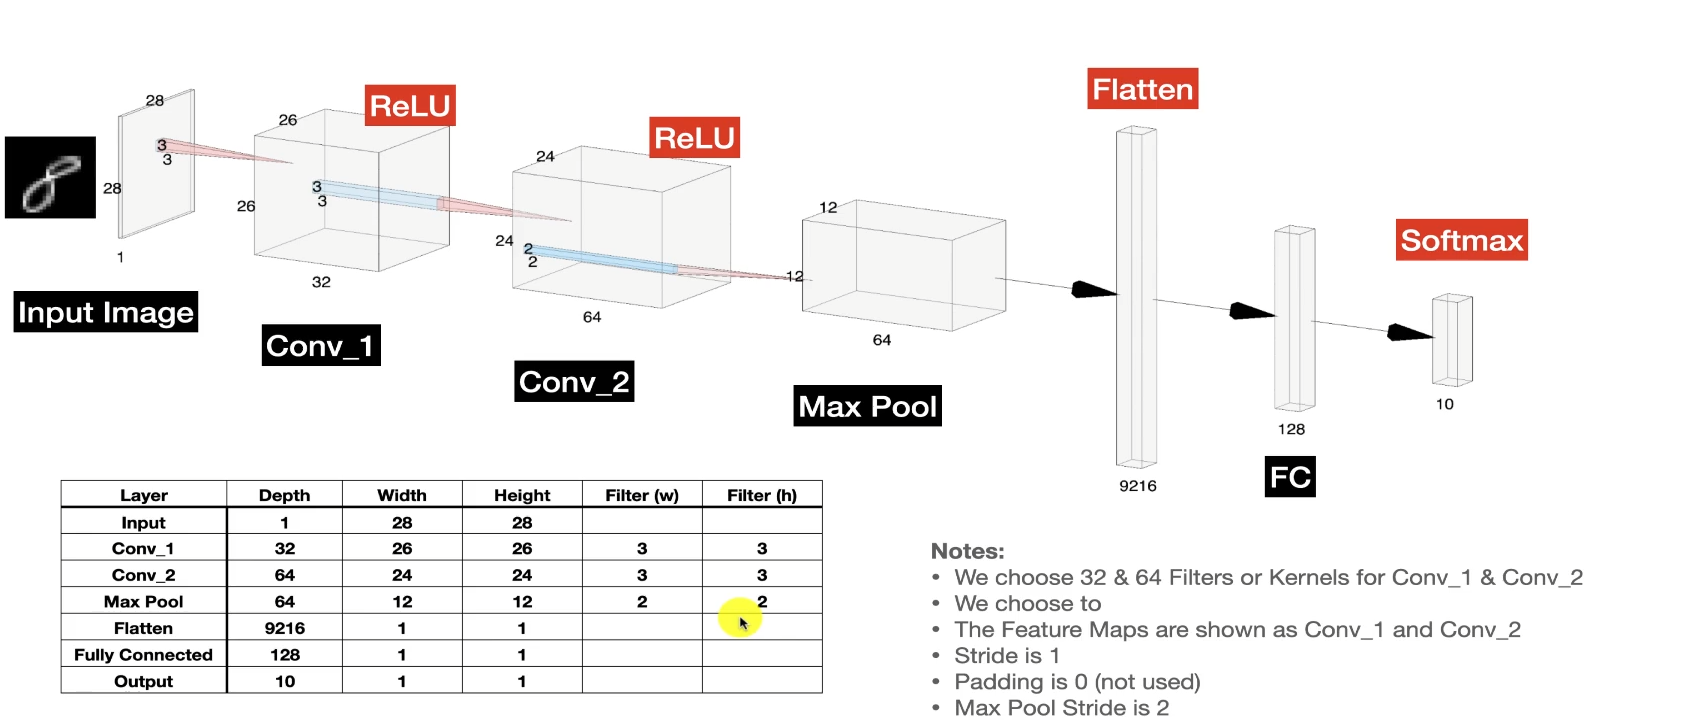
- feature map의 크기와 파라미터의 갯수 계산해볼것

- 파라미터 계산
- 커널의 크기, 갯수, bias 만 신경쓰면 됨

- 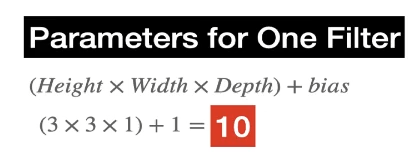

- ### Bias
    - 뉴런의 활성화 지점을 옮기는 상수값임.
    - 활성화되는 지점이 특정 값에 종속되는것을 방지함
    - 뉴런 당 설정되는 값임( cnn 에선 필터)
    - 학습가능한 파라미터임



- 파라미터 수 계산

## cnn의 장점

- FC layer에 비해 적은 파라미터
- 슬라이딩 윈도우를 통한 특징 맵 계산으로 파라미터를 공유함
    -지역성을 가진 특징을 더 잘 추출해냄
- 과적합 방지


## cnn 의 가정

- 저 수준의 특징은 지역성을 가짐
- 특징은 translational invariant 을 가정
    - 어디에 있든 특징을 감지할수 있음을 의미함
- 고 수준의 특징은 저 수준의 특징을 기반함을 가정함



## 학습 과정


1. 훈련가능 파라미터를 무작위 값으로 설정함
2. 신경망에 이미지를 순전파함
3. 손실 함수를 계산함
4. 역전파하여 가중치를 경사 하강법으로 갱신한다
5. 2~4 반복, 반복 1회를 1 epoch라 한다.
6. 여러번 반복한다.

## 손실 함수 계산
- cost function 이라고도 불림
- cross-entropy loss, binary cross-entropy loss mean square error(MSE) 등이 사용된다
- 교차 엔트로피 손실
    - 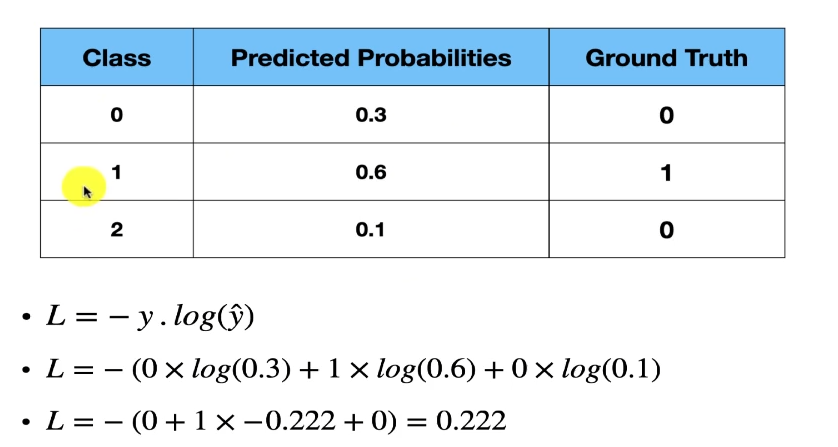

- Mean Square Error(MSE)
    - Regression에 자주 사용됨
    - 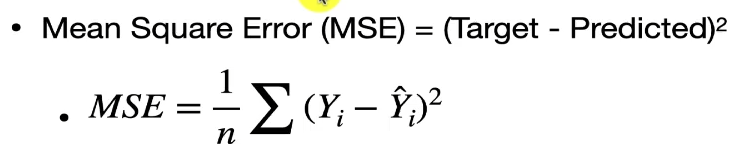

- 그 외
    - L1, L2
    - Hinge Loss
    - Mean Absolute Error(MAE)



- ## Back Propagation(역전파)
    - 계산된 손실 함수를 바탕으로 기존 가중치를 갱신하여 총합 손실율을 줄이는 과정임
    - 노드 마다 경사 하강법 수식을 계산함
        - 경사 하강법을 통해 global minima를 찾는것을 목표로 함
        - local minima를 벗어날 수 있을 정도의 스텝크기를 갖되 global minima를 넘어가지 않을 정도의 크기를 가져야함
    - **기존 가중치- 학습률 * 손실함수 변화량을 해당 노드 가중치 변화량으로 편미분한 값**
    - 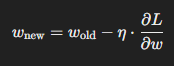
    - 연쇄 법칙을 사용해 계산함
    - 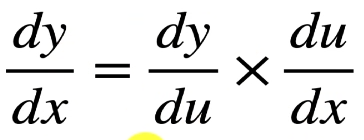


- ## 경사 하강법 종류
    - Naive Gradient Descent
        - 데이터셋 전부를 신경망에 통과시켜 가중치를 갱신함
        - 비용이 높음
    - Stochastic Gradient Descent (SGD)
        - 데이터 하나의 순전파가 끝날 때마다 역전파해 가중치를 업데이트함
        - 계산량 적고 학습 유용함
        - 진동이 심하고 학습이 불안정할수있음
    - Mini-Batch Gradient Descent
        - 배치 단위의 데이터를 순전파하고 역전파시켜 가중치 갱신함
        - 배치 크기는 8~256가량의 수치를 사용

    
    - standard SGD 문제점
        - 모든 파라미터에 고정적인 학습률을 사용하고, 이는 sgd가 saddle point(안장점) 이나 Local Minima 에 취약해짐
        - Optimizer
            - Momentum, Nestor's Acceleration 사용
            - Momentum
                - 학습률에 가속도 적용, 보통 0.9 사용
                - 오버슈팅 가능성있음
            - Nestor's Acceleration
                - 미래의 기울기 예측하여 기울기 계산함
            - Adam
                - 널리쓰임
                - 
            - 그 외
                - 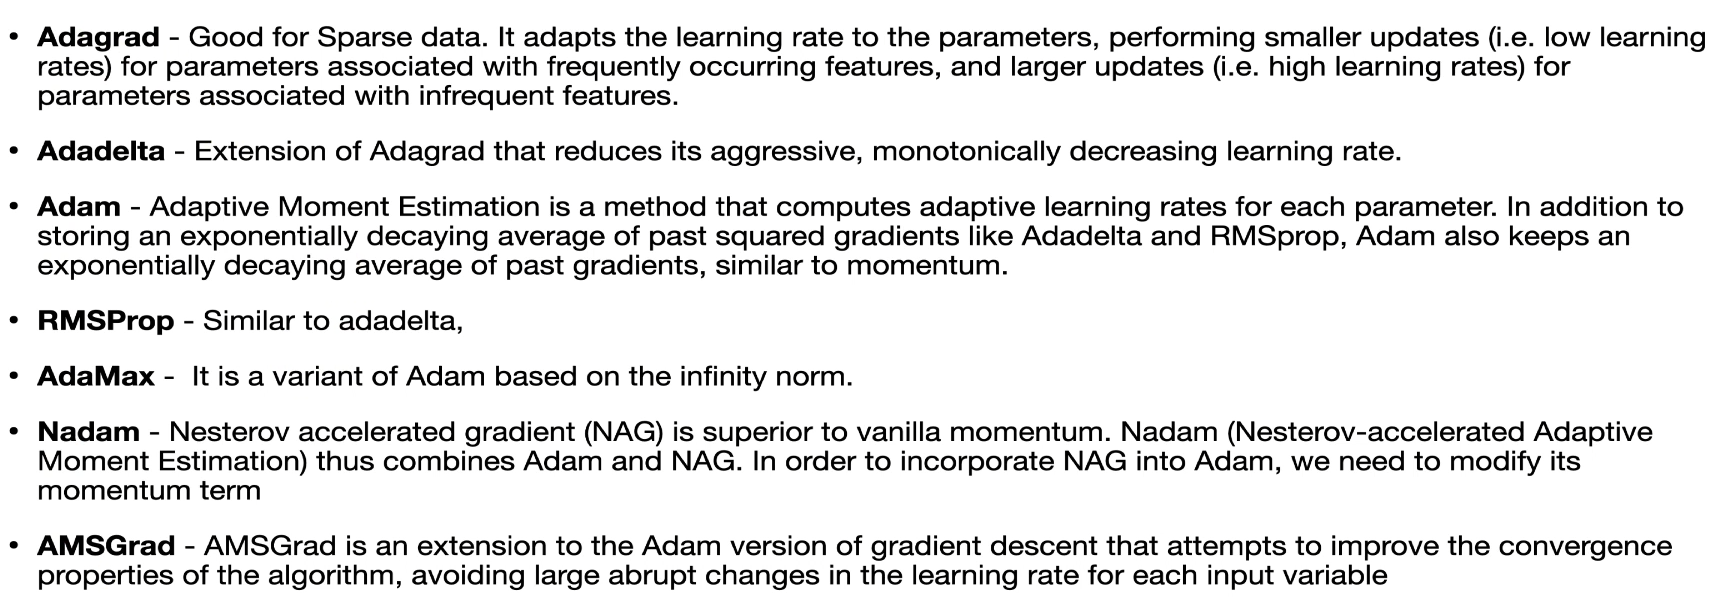